## Computer algebra with `Sympy`

based on [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf) and [Lecture notes on symbolic computing with SymPy](http://www.c3se.chalmers.se/common/python_course_2012/Lecture10_SymPy_2012.pdf)

## Basics of `Sympy`

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Force an expression as symbolic, get its numeric value and operate with it

In [2]:
expr = S("1/7")
print expr
print N(expr)
print expr+1

1/7
0.142857142857143
8/7


Note that `pi` is the `Sympy` expresion, whereas `np.pi` is the `Numpy` one

In [3]:
print pi
print pi + 1
print N(pi+1)
print np.pi
print np.pi+1

pi
1 + pi
4.14159265358979
3.14159265359
4.14159265359


tell `Sympy` to pretty print results

In [4]:
init_printing(use_latex=True)

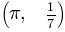

In [5]:
pi, expr

In [6]:
init_printing(use_latex=False)
pi, expr

(π, 1/7)

## Expressions

expresions can be any math

In [7]:
expr = 2*x + 3*x - sin(x) - 3*x + 42

NameError: name 'x' is not defined

but we have to tell `Sympy` that our variables are symbolic and not python regular variables

In [8]:
x,y,z  = symbols("x y z")
expr = 2*x + 3*x - sin(x) - 3*x + 42
expr

2⋅x - sin(x) + 42

In [9]:
expand((x+2)**2)

 2          
x  + 4⋅x + 4

In [10]:
factor( x**2-2*x-8 )

(x - 4)⋅(x + 2)

substitions

In [11]:
init_printing(use_latex=True)
expr = (sin(x) + cos(y))/2
expr

In [12]:
expr.subs({x: 1, y:2})

In [13]:
N(expr.subs({x: 1, y:2}))

In [14]:
expr.subs({x: y**2+1})

In [15]:
expr.subs({x: y**2+1}).subs({y: 2})

In [16]:
expr.subs({x: y**2+1}).subs({y: 2}).n()

testing for equality

In [17]:
p = (x-5)*(x+5)
q = x**2 - 25
print  p == q 
print  p - q == 0 
print simplify(p - q) == 0

False
False
True


In [18]:
nu,mu = symbols("n,m")
nu*2+mu

In [19]:
g,a = symbols("\\gamma \\alpha")
g*2+a

In [20]:
r, p, t = symbols("r, \\phi, \\theta")
2*r+3*p+5*t

## Solvers

In [21]:
solve( x**2 + 2*x - 8, x)

In [22]:
sol = solve( x**2 + 2*x - 8, x)
sol[0], sol[1], type(sol[0]), type(sol[1])

(-4, 2, sympy.core.numbers.Integer, sympy.core.numbers.Integer)

In [23]:
sol[0]+x

In [24]:
type(sol[0]+1.)

sympy.core.numbers.Float

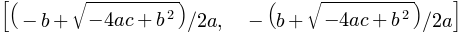

In [25]:
a, b, c = symbols('a b c')
solve( a*x**2 + b*x + c, x)    

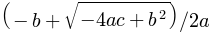

In [26]:
sol = solve( a*x**2 + b*x + c, x)[0]
sol

In [27]:
sol.subs({a:1, b:2, c:3})

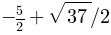

In [28]:
sol.subs({a:1, b:5, c:-3})

Want to complete the square so that: $x^2-4x+7=(x-h)^2+k$ for some constants $h$ and $k$.

We solve $(x-h)^2+k-(x^2-4x+7)=0$

In [29]:
h, k = symbols('h k')
solve( (x-h)**2 + k - (x**2-4*x+7), [h,k] )    

verify it


In [30]:
((x-2)**2+3).expand()

systems of equations

$$ x^2+y=0$$
$$ 3y-x=0$$

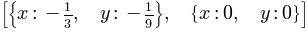

In [31]:
solve ([x**2+y, 3*y-x])

## `Sympy` to `Python` and `Numpy`

See [Sympy Numeric Computation](http://docs.sympy.org/latest/modules/numeric-computation.html)


In [32]:
x,y,z  = symbols("x y z")
sol = solve( a*x**2 + b*x + c, x)[0]
s1 = N(sol.subs({a:1, b:5, c:-3}))
ss1 = sqrt(s1)
ns1 = np.sqrt(float(s1))
print ss1, type(ss1)
print ns1, type(ns1)

0.735786154496746 <class 'sympy.core.numbers.Float'>
0.735786154497 <type 'numpy.float64'>


obtain a one argument function

In [33]:
expr = (sin(x) + x**2)/2

In [34]:
f1 = lambdify(x, expr)

In [35]:
f1(10)

In [36]:
f1(np.array([1,2,3]))

TypeError: only length-1 arrays can be converted to Python scalars

In [37]:
[f1(i) for i in [10,2,3]]

obtain a vectorized function

In [38]:
f2 = lambdify(x, expr, "numpy")

In [39]:
f2(10)

In [40]:
f2(np.array([10,2,3]))

array([ 49.72798944,   2.45464871,   4.57056   ])

In [41]:
%timeit [f1(i) for i in range(1000)]

1000 loops, best of 3: 751 µs per loop


In [43]:
%timeit f2(np.arange(1000))

The slowest run took 5.33 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 35.8 µs per loop


two arguments function

In [44]:
expr = (sin(x) + cos(y))/2

In [47]:
f = lambdify([x, y], expr, "numpy")

In [53]:
f(10,1)

In [61]:
f([10,10],[1,1])

array([-0.0018594, -0.0018594])

## Calculus

Differentiation

In [50]:
diff(x**2)

In [51]:
diff(x**2+x*y, x)

In [52]:
diff(exp(x))

differentiation knows some rules (for instance the product rule)

In [53]:
diff(x**2*sin(x))

differential equations, solving $\frac{dy}{dt}=y(t)+t$

In [74]:
t, C1 = symbols("t C1")
y = symbols("y", cls=Function)
dydt = y(t)+t
eq = dydt-diff(y(t),t)
yt = dsolve(eq, y(t))
yt

In [75]:
yt.rhs

check the solution

In [76]:
simplify(dydt.subs({y(t): yt.rhs})-diff(yt.rhs,t))

set initial conditions $Y(0)=2$ and obtain $C1$

In [77]:
eq1 = Eq(yt.rhs.subs({ t:0}).evalf(), 2.)
sol = solve([eq1], [C1])
C1_val = sol[C1]
C1_val

In [78]:
fY = lambdify(t, yt.rhs.subs({C1: C1_val}), "numpy")
fY(0)

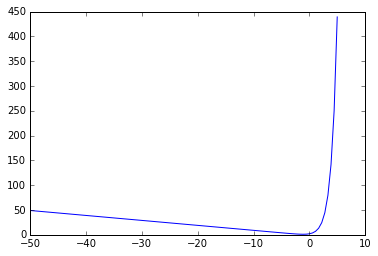

In [79]:
t_vals = np.linspace(-50,5,100)
plt.plot(t_vals, fY(t_vals))

## Some problems

### Tangent line to a function

The tangent line to the function $f(x)$ at $x = x_0$ is the line that passes
through the point $(x_0, f(x_0))$ and has the same slope as the function
at that point. The tangent line to the function $f(x)$ at the point
$x = x0$ is described by the equation
$$T_1(x) = f(x_0) + f'(x_0)(x − x_0)$$

What is the equation of the tangent line to $f(x) = \frac{1}{2}x^2$
at $x_0 = 1$?

In [80]:
from sympy import *
x, f = symbols("x f")
f = 1./2*x**2
print "f(x) ", f
df = diff(f,x)
print "f'(x)", df
x
T_1 = f.subs({x:1}) + df.subs({x:1})*(x - 1)
print "T1(x)", T_1

f(x)  0.5*x**2
f'(x) 1.0*x
T1(x) 1.0*x - 0.5


check value and slope of function and tangent line are equal

In [81]:
T_1.subs({x:1})- f.subs({x:1})

In [82]:
diff(T_1,x).subs({x:1}) - diff(f,x).subs({x:1})

obtain python functions from expressions and plot

In [83]:
fp = lambdify(x,f, "numpy")
tp = lambdify(x,T_1, "numpy")

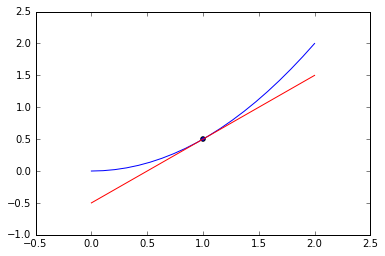

In [84]:
xr = np.linspace(0,2,20)
plt.plot(xr, fp(xr), color="blue")
plt.plot(xr, tp(xr), color="red")
plt.scatter(1, fp(1))

### Damped harmonic oscilator

In [85]:
from sympy import *
t, w = symbols("t \\omega_0", positive=True)
d = symbols("\\xi", real=True)
x = Function("x", real=True)
eq = x(t).diff(t,t) + 2*d*w*x(t).diff(t) + w**2*x(t)

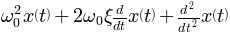

In [86]:
eq

Resolvemos con condiciones iniciales $\omega=0$ y $\xi=1/10$

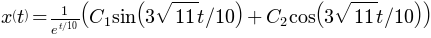

In [87]:
eq = eq.subs(w, 1).subs(d, Rational(1,10))
# Solve differential equation
sol = dsolve(eq,x(t))
sol

const = {C1: sqrt(11)/33, C2: 1}
Applying initial conditions 
x(t) = 


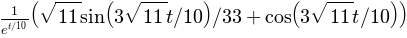

In [88]:
# Starting conditions x(0) = 1, and dx(0)/dt = 0
C1, C2 = symbols("C1, C2")
const = solve([sol.rhs.subs(t,0) - 1, sol.rhs.diff(t).subs(t, 0)], [C1,C2])
print "const =", const
# Replace C1 and C2 in solution
initvalue_solution = sol.rhs.subs(C1, const[C1]).subs(C2, const[C2])
print "Applying initial conditions \nx(t) = "
initvalue_solution

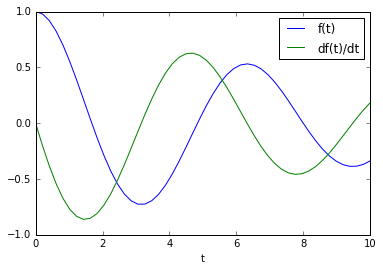

In [89]:
T = np.linspace(0, 10)
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, dFdT(T))
plt.legend(("f(t)", "df(t)/dt"))
plt.xlabel("t")


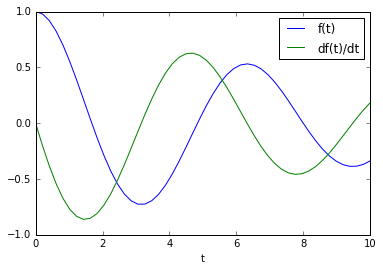

In [90]:
T = np.linspace(0, 10)
F = lambdify(t, initvalue_solution, "numpy")
dFdT = lambdify(t, initvalue_solution.diff(), "numpy")
plt.plot(T, F(T))
plt.plot(T, dFdT(T))
plt.legend(("f(t)", "df(t)/dt"))
plt.xlabel("t")